In [1]:
import time
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## Introduction

As we all know, people like to see visualization instead of a bunch of tedious formulas. For convex optimization, visulization can turn the formulas into vivid plots, which can help us develop a better intuition to understand and design the optimization algorithms. There are quite a lot of algorithms taught in class, if we can visualize the process of algorithms in colorful and vivid plots, it will give us a deeper understanding and impression of the algorithms. 

In my report, I divide the content into three parts, quadratic programming, unconstrained problem and geometric programming. In each part, I introduce several classic algorithms and present their visualization. I also compare different algorithms by analysing their performance via plots.

## Part 1: Quadratic Programming

Quadratic programming is to minimize quadratic function over linear inequality and equality constraints. Quadratic programming is widely used in machine learning area. Least-squares and SVM are two classic algorithms can be transformed and solved by quadratic programming.

### (1) Least-squares

Least-squares algorithm is to find a line best fit all the data points by minimizing the sum of squared residuals (e.g. the difference between an observed value, and the fitted value provided by a model).

$$\text{Minimize} \; ||Ax - b||_2^2$$

Optimal:  922.0405151453684
Variable:  [1.42099035 0.46761358]


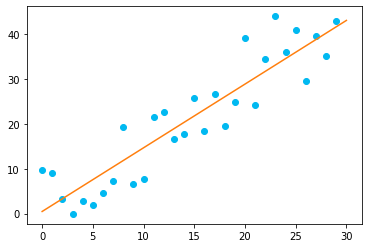

In [2]:
m = 30
n = 2
np.random.seed(2020)
A = np.arange(m).reshape(m, 1)
A = np.hstack((A, np.ones((m, 1))))
delta = np.random.uniform(-10, 10, size=(m,))
b = (np.arange(m) * 1.5 + delta)

x = cp.Variable(n)
obj = cp.Minimize(cp.sum_squares(A * x - b))
prob = cp.Problem(obj)
prob.solve()

print("Optimal: ", prob.value)
print("Variable: ", x.value)
x = x.value
plt.scatter(A[:,0], b, c='#00b9f1')
plt.plot([0, m], [0 * x[0] + x[1], m * x[0] + x[1]], color='#ff7f0e')
plt.show()

### (2) Constrained Least-squares

$$\begin{aligned}
&\text{Minimize} \; ||Ax - b||_2^2 \\
&s.t. 1 \le x \le 1.2
\end{aligned}$$

Optimal:  1215.1206974702393
Variable:  [1.2 1.2]


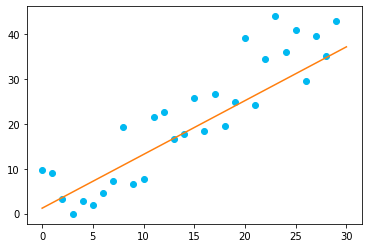

In [3]:
m = 30
n = 2
np.random.seed(2020)
A = np.arange(m).reshape(m, 1)
A = np.hstack((A, np.ones((m, 1))))
delta = np.random.uniform(-10, 10, size=(m,))
b = (np.arange(m) * 1.5 + delta)

x = cp.Variable(n)
obj = cp.Minimize(cp.sum_squares(A * x - b))
constraints = [1 <= x, x<= 1.2]
prob = cp.Problem(obj, constraints)
prob.solve()

print("Optimal: ", prob.value)
print("Variable: ", x.value)
x = x.value
plt.scatter(A[:,0], b, c='#00b9f1')
plt.plot([0, m], [0 * x[0] + x[1], m * x[0] + x[1]], color='#ff7f0e')
plt.show()

### (3) Hard-margin Linear SVM

Support Vector Machine (SVM) is one of the most popular classification techniques which aims to minimize the number of misclassification errors directly.  The goal of SVM is to find the best hyperplane that represents the largest separation(e.g. margin) between two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. Linear SVM can be divided into two categories, hard-margin svm and soft-margin svm,  which depends on the task. Hard-margin SVM can formulated as follows: 

$$\begin{aligned}
&\text{Minimize} \; \frac{1}{2}||w||_2^2\\
&s.t. \; y_i(w^T x_i + b) \ge 1; \; (i = 1,...,m) 
\end{aligned}$$

From above, we can see that our margins are defined by the hard constraint, which means it can only deal with points that are linearly seperable.

Problem Status:  optimal
Weight Value:  [0.20734197] [0.24040408]


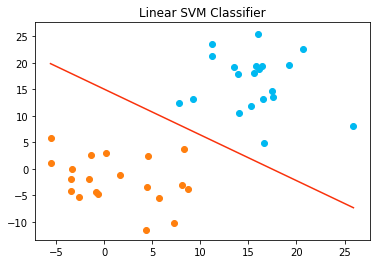

In [4]:
np.random.seed(1)
# each sample is 2-dim
n = 2
# 20 samples
m = 20
x1 = np.random.normal(0, 5, size=(m, n))
x2 = np.random.normal(15, 5, size=(m, n))
x = np.vstack((x1, x2))
y = np.append(np.full(m, -1), np.ones(m)).reshape(-1, 1)

w = cp.Variable((n, 1))
b = cp.Variable()

objective = cp.Minimize(0.5 * cp.norm(w)**2)
constraints = [cp.multiply(y, x * w + b) >= 1]
prob = cp.Problem(objective, constraints)

result = prob.solve()
print("Problem Status: ", prob.status)
print("Weight Value: ", w.value[0], w.value[1])

xp = np.linspace(min(x[:, 0]), max(x[:, 0]), 10)
yp = - (w.value[0] * xp + b.value) / w.value[1]
yp1 = np.array(- (w.value[0]*xp + b.value) / w.value[1] )# margin boundary for support vectors for y=1
yp0 = np.array(- (w.value[0]*xp + b.value) / w.value[1] )# margin boundary for support vectors for y=0

idx0 = np.where(y==-1) 
idx1 = np.where(y==1)

plt.scatter(x1[:, 0], x1[:, 1], c='#ff7f0e')
plt.scatter(x2[:, 0], x2[:, 1], c='#00b9f1')
plt.plot(xp, yp, '#f9320c')
plt.title('Linear SVM Classifier')
plt.show()

### (4) Soft-margin Linear SVM

To extend SVM to cases in which the data are not linearly separable, we introduce the slack variables to soften the constraint for the optimal hyperplane:

$$y_i(w^T x_i + b) \ge 1-\xi_i \;\text{and}\; \xi_i \ge 0$$

The new constraint allows a functional margin that is less than 1, and also incorporate a penalty of cost $C\xi_i$ for any data point that falls within the margin on the correct side of the separating hyperplane (e.g. when $0 \lt \xi_i \le 1$), or on the wrong side of the separating hyperplane (e.g. when $\xi_i \gt 1$). Hence, the constraint prefers hyperplane that seperates two classes as much as possible, but also permits data points that are not correctly classified with a penalty proportional to the amount of misclassification. The optimization problem of soft-margin linear svm becomes:

$$\begin{aligned}
&\text{Minimize} \; \frac{1}{2}||w||_2^2 + C \sum_{i=1}^{m} \xi_i\\
&s.t. \; y_i(w^T x_i + b) \ge 1-\xi_i \;\text{and}\; \xi_i \ge 0; \; (i = 1,...,m)
\end{aligned}$$

Problem Status:  optimal
Weight Value:  [0.22494982] [0.38013047]


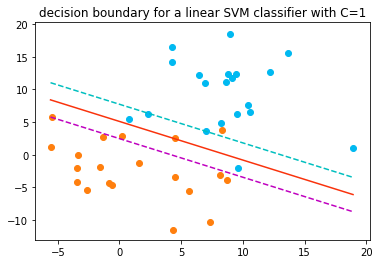

In [5]:
np.random.seed(1)
# each sample is 2-dim
n = 2
# 20 samples
m = 20
x1 = np.random.normal(0, 5, size=(m, n))
x2 = np.random.normal(8, 5, size=(m, n))
x = np.vstack((x1, x2))
y = np.append(np.full(m, -1), np.ones(m)).reshape(-1, 1)
C = 1

w = cp.Variable((n, 1))
b = cp.Variable()
xi = cp.Variable((2 * m, 1))

objective = cp.Minimize(0.5 * cp.norm(w)**2 + C * cp.sum(xi))
constraints = [cp.multiply(y, x * w + b) >= 1 - xi, xi >= 0]
prob = cp.Problem(objective, constraints)

result = prob.solve()
print("Problem Status: ", prob.status)
print("Weight Value: ", w.value[0], w.value[1])

xp = np.linspace(min(x[:, 0]), max(x[:, 0]), 10)
yp = - (w.value[0] * xp + b.value) / w.value[1]
yp1 = np.array(- (w.value[0]*xp + b.value - C)/w.value[1] )# margin boundary for support vectors for y=1
yp0 = np.array(- (w.value[0]*xp + b.value + C)/w.value[1] )# margin boundary for support vectors for y=0

idx0 = np.where(y==-1) 
idx1 = np.where(y==1)

plt.scatter(x1[:, 0], x1[:, 1], c='#ff7f0e')
plt.scatter(x2[:, 0], x2[:, 1], c='#00b9f1')
plt.plot(xp, yp, '#f9320c', xp, yp1, '--c', xp, yp0, '--m')
plt.title('decision boundary for a linear SVM classifier with C={}'.format(C) )
plt.show()

##  Part 2: Unconstrained Problem

Unconstrained optimization problems consider the problem of minimizing an objective function that depends on real variables with no restrictions on their values. The unconstrained optimization problem is 

$$\text{Minimize}\; f(x)$$

where $f: R^n \to R$ is convex and twice continuously differentiable (which implies that $dom \;f$ is open). Unconstrained problem can be solved by descent methods like exact line search and backtracking line search.

Least squares problem is one common type of unconstrained problem which tries to solve

$$\text{Minimize}\; ||Ax - b||_2^2$$

In order to solve the problem by CVXPY and plot the result, we make the problem more concrete:

$$\text{Minimize} \; f(x) = \frac{1}{2}(x_1^2 + \gamma x_2^2)$$

This is our objective function. And I will use four different methods to solve it, including general gradient descent, exact line search, backtracking line search and Newton's method. And finally I will compare the performance of the four methods and illustrate my observation.

In [6]:
gamma = 10
iterations = 200
results_map = {}


def train_2d(trainer):
    x1, x2 = -10, -2
    results = [(x1, x2)]
    for i in range(iterations):
        x1, x2 = trainer(x1, x2)
        results.append((x1, x2))
    x1 = x1 if x1 > 1e-5 else 0
    x2 = x2 if x2 > 1e-5 else 0
    optimal_value = f_2d(x1, x2) if f_2d(x1, x2) > 1e-5 else 0
    print('epoch %d\nx1: %f, x2: %f' % (i + 1, x1, x2))
    print('optimal value: ', optimal_value)
    return results


def show_trace_2d(results): 
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-10.5, 2.0, 0.1), np.arange(-3.0, 2.0, 0.1))
    plt.contour(x1, x2, f_2d(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()


# object function
def f_2d(x1, x2):
    return 1/2 * (x1 ** 2 + gamma * x2 ** 2)

### (1) General Gradient Descent Method

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. To find a local minimum of a function using gradient descent, we take steps proportional to the negative of the gradient of the function at the current point. The general gradient descent method follows the procedure:

$$x^{k} = x^{k-1} - t \nabla f(x^{k-1}) $$
Where $t$ is step size and  $\nabla f(x^{k-1})$ is gradient.

epoch 200
x1: 0.000000, x2: 0.000000
optimal value:  0


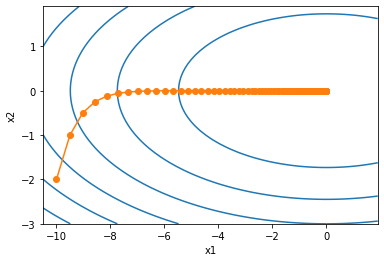

In [7]:
def gd(x1, x2):
    # fix the step size
    step = 0.05
    return (x1 - step * x1, x2 - step * gamma * x2)

gd_results = train_2d(gd)
show_trace_2d(gd_results)

results_map['General Gradient Descent'] = gd_results

### (2) Gradient Descent Method with Exact Line Search (Steepest Descent)

The steepest descent gradient iteratively update the variables $x1$ and $x2$. Assume that k denotes the k-th iteration. The first order derivative of k-th variables $x_1^k$ and $x_2^k$ can be calculated as $\nabla f(x^k) = (x_1^k, \gamma x_2^k)$. And $x_1^{k+1}$ and $x_2^{k+1}$ are respectively updated by:

$$x_1^{k+1} = x_1^k - t x_1^k $$
$$x_2^{k+1} = x_2^k - t x_2^k $$

where t is the step size. Exact line search tries to find the $t$ by solving:

$$
\begin{aligned}
t^k &= \text{argmin} \; {f(x^k - t \nabla f(x^k)}\\
&= \frac{1}{2}[(x_1^k - tx_1)^2 + \gamma(x_2^k - t\gamma x_2^k)^2]
\end{aligned}
$$

by making the derivative of $t$ in the above formulation and setting the calculated equation to 0, the learning rate t in the k-th iteration can be obtained:

$$t = \frac{x_1^{k^2} + \gamma^2 x_2^{k^2}}{x_1^{k^2} + \gamma^3 x_2^{k^2}}$$

Thus we can get:

$$x_1^{k+1} = x_1^k - \frac{x_1^{k^2} + \gamma^2 x_2^{k^2}}{x_1^{k^2} + \gamma^3 x_2^{k^2}} x_1^k$$
$$x_2^{k+1} = x_2^k - \frac{x_1^{k^2} + \gamma^2 x_2^{k^2}}{x_1^{k^2} + \gamma^3 x_2^{k^2}} \gamma x_2^k$$


epoch 200
x1: 0.000000, x2: 0.000000
optimal value:  0


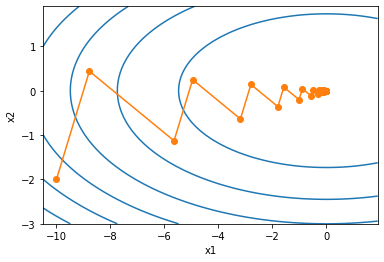

In [8]:
def gd(x1, x2):
    step = (x1**2+(gamma**2)*(x2**2))/(x1**2+(gamma**3)*(x2**2))
    return (x1 - step * x1, x2 - step * gamma * x2)

els_results = train_2d(gd)
show_trace_2d(els_results)

results_map['Exact Line Search'] = els_results

### (3) Gradient Descent Method with Backtracking Line Search

Backtracking line search is a line search method to determine the maximum amount to move along a given search direction. It involves starting with a relatively large estimate of the step size for movement along the search direction, and iteratively shrinking the step size (i.e., "backtracking") until a decrease of the objective function is observed that adequately corresponds to the decrease that is expected, based on the local gradient of the objective function.

Backtracking line search follows the steps:


$$\begin{aligned}
&\text{Given a decent direction } \Delta x \text{ for } f \text{ at } x, \alpha \in (0,0.5), \beta \in(0, 1), t:=1 \\
&\text{While } f(x)-f(x + t\Delta x) \le \alpha |f(x)^T (t\Delta x)|, \;t:=\beta t \\
&x^{k} = x^{k-1} - t \nabla f(x^{k-1})  
\end{aligned}$$

epoch 200
x1: 0.000000, x2: 0.000000
optimal value:  0


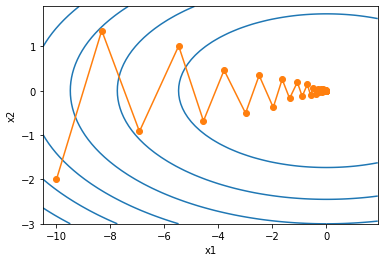

In [9]:
def gd(x1, x2):
    alpha = 0.25
    beta = 0.8
    step = 1
    gradient = np.array([x1, gamma * x2])
    while f_2d(x1, x2) - f_2d(x1-step*x1, x2-step*gamma*x2) < alpha * step * np.sum(gradient**2):
        step *= beta
    return (x1 - step * x1, x2 - step * gamma * x2)

bls_results = train_2d(gd)
show_trace_2d(bls_results)

results_map['Backtracking Line Search'] = bls_results

### (4) Newton’s method

Newton’s method repeats $$x^{k} = x^{k-1} - (\nabla^2 f(x^{k-1}))^{-1} \nabla f(x^{k-1}) $$
Here $\nabla^2 f(x^{k-1})$ is the Hessian matrix of $f$ at $x^{k-1}$


epoch 200
x1: 0.000000, x2: 0.000000
optimal value:  0


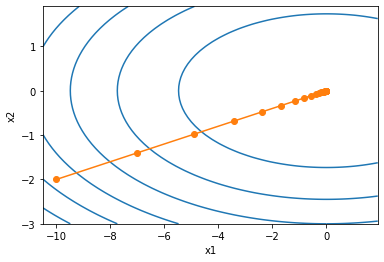

In [10]:
from sympy import symbols, diff

x1, x2 = symbols("x1, x2")
f = 1/2 * (x1 ** 2 + gamma * x2 ** 2)

def hessian(f, x):
    hessian_obj = np.array([[diff(f, x1, 2), diff(diff(f, x1), x2)],
                           [diff(diff(f, x2), x1), diff(f, x2, 2)]], dtype=float)
    return hessian_obj

def gd(x1, x2):
    step = 0.3
    x = np.array([x1, x2])
    # calculate hessian matrix
    hessian_t = np.linalg.inv(hessian(f, x))
    # calculate first order derivative
    order_1 = np.array([x1, gamma * x2])
    new_x = x - step * hessian_t @ order_1
    return (new_x[0], new_x[1])

nt_results = train_2d(gd)
show_trace_2d(nt_results)

results_map['Newton’s method'] = nt_results

### (5) Result Analysis

Finally, I put all the plot in one image to compare the traces more clearly. From the image, we can observe that Newton's method takes the least iterations to close to the optimum, then follows exact line search method. And it seems that general gradient descent is the slowest method to converge. Interestingly, the trace of Newton's method is a straight line connects between the start point and the optimum, which is attributed to its second derivative. Second derivative provide a guarantee for Newton's method finding the optimum. And Newton's method can be faster when the second derivative is known and easy to compute.


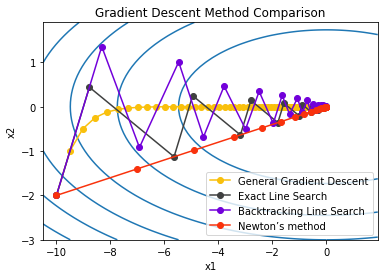

In [11]:
c = ['#f9c00c', '#3f4040', '#7200da', '#f9320c']
for i, (key, results) in enumerate(results_map.items()):
    plt.plot(*zip(*results), '-o', color=c[i], label=key)
plt.legend(loc='lower right')
plt.title('Gradient Descent Method Comparison')
x1, x2 = np.meshgrid(np.arange(-10.5, 2.0, 0.1), np.arange(-3.0, 2.0, 0.1))
plt.contour(x1, x2, f_2d(x1, x2), colors='#1f77b4')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In order to confirm my observation, I plot objective function value versus iterations. From the following image, we can obviously rank the four methods by their converge speed: Newton's method  $\approx$ Exact line search method $>$ Backtracking line search method $>$ General gradient descent, which is similar to our previous observation.

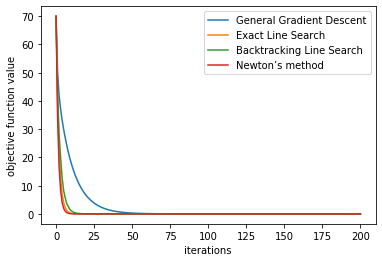

In [12]:
x = np.arange(iterations+1)

def get_value(results):
    values = []
    for result in results:
        values.append(f_2d(result[0], result[1]))
    return values

for key, results in results_map.items():
    plt.plot(x, get_value(results), label=key)
    
plt.legend(loc='upper right')
plt.xlabel('iterations')
plt.ylabel('objective function value')
plt.show()

## Part 3: Geometric Programming

### Logistic Regression

Logistic regression can be solved by using geometric programming. In the following part, I formulate the logistic regression as standard GP and use CVXPY to solve the problem.

Given data $(x_i, y_i), i = 1,...,n$, where $y_i \in \{0, 1\}$ and $x_i \in R^p$, the likelihood of the logistic regression model is
$$
\begin{aligned}
&\prod_{i=1}^{n} p_i^{y_i} (1-p_i)^{1-y_i} \\
&=\prod_{i=1}^{n} \left(\frac{e^{x^T \beta}}{1 + e^{x_i^T \beta}}\right)^{y_i} \left(\frac{1}{1 + e^{x_i^T \beta}}\right)\\
&=\prod_{i:y_i=1} e^{x_i^T} \beta y_i \prod_{i=1}^{n} \left(\frac{1}{1 + e^{x_i^T \beta}} \right)
\end{aligned}
$$

The MLE solves 
$$\text{minimize} \; \prod_{i:y_i=1} e^{-x_i^T} \beta \prod_{i=1}^{n} \left(1 + e^{x_i^T \beta}\right)$$

Let $Z_j = e^{\beta_j}, j=1,...,p$. The objective becomes
$$\prod_{i:y_i=1} \prod_{j=1}^{p} z_j^{-x_{ij}} \prod_{i=1}^{n} \left(1 + \prod_{j=1}^{p} z_j^{x_{ij}} \right)$$

Which can be turned into GP:
$$
\begin{aligned}
&\text{minimize} \; \prod_{i:y_i=1}s_i \prod_{i=1}^{n} t_i\\
&s.t. \prod_{j=1}^{p} z_j^{-x_{ij}} \le s_i, \; i=1,...,m\\
&1 + \prod_{j=1}^{p} z_j^{x_{ij}} \le t_i, \; i=1,...,n
\end{aligned}
$$

in variables $s \in R^m, t\in R^n$, and $z \in R^p$. Here $m$ is the number of obvervations with $y_i = 1$.

In [13]:
def logistic_regression(num):
    a = 1
    b = -5
    np.random.seed(0)
    m = num
    x = 10 * np.random.rand(m, 1)
    y = np.random.rand(m)
    x_list = []
    
    for i in range(len(y)):
        if y[i] < np.exp(a * x[i] + b) / (1 + np.exp(a * x[i] + b)):
            y[i]=1
            x_list.append([x[i][0], 1])
        else:
            y[i]=0
            
    x_list = np.array(x_list)
    ones = np.ones((m,1))
    X = np.hstack((x,ones))
    
    t = cp.Variable(len(x_list), pos=True)
    s = cp.Variable(m, pos=True)
    z = cp.Variable(2, pos=True)
    
    obj = cp.prod(t) * cp.prod(s)
    constraint = []
    for i in range(len(x_list)):
        constraint += [z[0]**x_list[i][0] * z[1]**x_list[i][1] <= t[i]]
    for j in range(m):
        constraint += [1+z[0]**(-X[j][0]) * z[1]**(-X[j][1]) <= s[j]]
        
    problem = cp.Problem(cp.Minimize(obj), constraint)
    problem.solve(gp=True)
    print("Optimal value: ", problem.value)
    theta = -np.log(z.value)
    print("Theta value: ", theta)
    aml = theta[0]
    bml = theta[1]
    us = np.linspace(-1, 11, 1000)
    ps = 1 / (1 + np.exp(-aml * us - bml))
    plt.plot(us, ps, '-')
    plt.scatter(x, y, c='#ff7f0e', marker='.')
    plt.show()

Optimal value:  23406770701780.48
Theta value:  [ 1.06152309 -5.24872978]


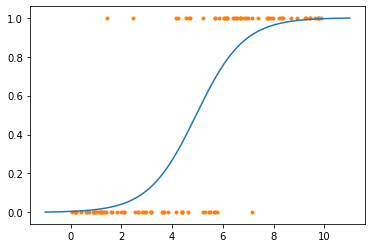

Total time:  0.8020429611206055


In [14]:
start = time.time()
logistic_regression(100)
end = time.time()
print("Total time: ", end-start)

## Conclusion

The project implements the visualization of multiple convex optimization algorithms, including descent method, Newton's method, gradient method, etc. Through this project, I gain a deeper understanding of the taught algorithms, which also brings me more interests about other algorithms. In the project, I mainly use Matplotlib which is a powerful and easy-to-use library to plot different types of charts, and there are still some more fancy framework like plotly, Seaborn, pygal that we can explore in the future.